In [1]:

import pandas as pd
from IPython.core.display import display, HTML
from sklearn.naive_bayes import MultinomialNB
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


In [3]:
df=pd.read_csv('../input/textdb3/fake_or_real_news.csv')

In [4]:
df.head()

Unnamed: 0  \
0  8476         
1  10294        
2  3608         
3  10142        
4  875          

                                                                                   title  \
0  You Can Smell Hillary’s Fear                                                            
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
2  Kerry to go to Paris in gesture of sympathy                                             
3  Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'    
4  The Battle of New York: Why This Primary Matters                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [6]:
df.count()

Unnamed: 0    6335
title         6335
text          6335
label         6335
dtype: int64

In [8]:
fake_set = df.loc[df['label'] == 'FAKE']
#fake_set = df.loc[df['label']]
real_set = df.loc[df['label'] == 'REAL']
#real_set = df.loc[df['label']]
print(fake_set.count())
print(real_set.count())

Unnamed: 0    3164
title         3164
text          3164
label         3164
dtype: int64
Unnamed: 0    3171
title         3171
text          3171
label         3171
dtype: int64


In [34]:
train_set = pd.concat([fake_set[0:2199],real_set[0:2199]])
test_set = pd.concat([fake_set[2200:],real_set[2200:]])
print(train_set.head())

   Unnamed: 0  \
0  8476         
1  10294        
3  10142        
5  6903         
6  7341         

                                                                                   title  \
0  You Can Smell Hillary’s Fear                                                            
1  Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)   
3  Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'    
5  Tehran, USA                                                                             
6  Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On               

                                                                                                                                                                                                                                                                                                                                                        

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
tfidf_vectorizer = TfidfVectorizer( max_features=2000000, stop_words='english', min_df=0.002, max_df=0.7, 
                                   use_idf=True, ngram_range=(1,3))

In [36]:
from sklearn.feature_selection import SelectKBest, chi2
tv = tfidf_vectorizer.fit(train_set['text'])
%time train_tfidf_matrix = tv.transform(train_set['text'])
ch2 = SelectKBest(chi2, k='all')
train_set_selected = ch2.fit_transform(train_tfidf_matrix, train_set['label'])

CPU times: user 7.88 s, sys: 1.79 ms, total: 7.88 s
Wall time: 7.9 s


In [37]:
%time model1 = MultinomialNB().fit(train_tfidf_matrix, train_set['label'])
%time model2 = MultinomialNB().fit(train_set_selected, train_set['label'])

CPU times: user 29.2 ms, sys: 1.97 ms, total: 31.2 ms
Wall time: 29.4 ms
CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 28.1 ms


In [38]:
test_tfidf_matrix = tv.transform(test_set['text'])
test_set_selected = ch2.transform(test_tfidf_matrix)

In [39]:
all_predictions1 = model1.predict(test_tfidf_matrix)
all_predictions2 = model2.predict(test_set_selected)

In [40]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('accuracy of model1 {}'.format(accuracy_score(test_set['label'], all_predictions1)))
print('accuracy of model2 {}'.format(accuracy_score(test_set['label'], all_predictions2)))

accuracy of model1 0.9038759689922481
accuracy of model2 0.9038759689922481


              precision    recall  f1-score   support

        FAKE       0.92      0.88      0.90       964
        REAL       0.89      0.93      0.91       971

    accuracy                           0.90      1935
   macro avg       0.90      0.90      0.90      1935
weighted avg       0.90      0.90      0.90      1935



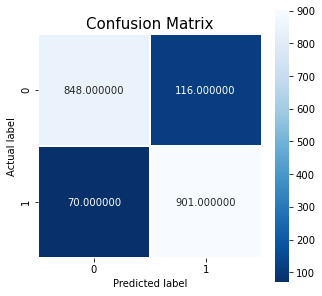

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions1)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions1)
print(report)

In [44]:

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer( max_features=200000, stop_words='english', min_df=0.002, max_df=0.5, ngram_range=(1,3))
count_vectorizer = count_vectorizer.fit(train_set['text'])
%time train_count_matrix = count_vectorizer.transform(train_set['text'])

CPU times: user 7.47 s, sys: 0 ns, total: 7.47 s
Wall time: 7.47 s


In [45]:
from sklearn.feature_selection import SelectKBest, chi2
top = SelectKBest(chi2, k='all')
train_set_selected2 = top.fit_transform(train_count_matrix, train_set['label'])

In [46]:
%time model2 = MultinomialNB().fit(train_set_selected2, train_set['label'])

CPU times: user 28.8 ms, sys: 1.06 ms, total: 29.9 ms
Wall time: 28.3 ms


In [47]:
test_count_matrix = count_vectorizer.transform(test_set['text'])
test_set_selected2 = top.transform(test_count_matrix)
all_predictions2 = model2.predict(test_set_selected2)

In [48]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print('accuracy {}'.format(accuracy_score(test_set['label'], all_predictions2)))
print('confusion matrix\n {}'.format(confusion_matrix(test_set['label'], all_predictions2)))
print('(row=expected, col=predicted)')

accuracy 0.8997416020671835
confusion matrix
 [[863 101]
 [ 93 878]]
(row=expected, col=predicted)


Text(0.5, 0, 'predicted label')

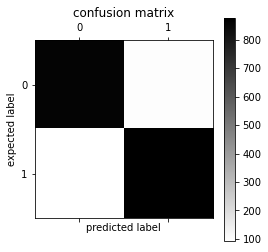

In [49]:
plt.matshow(confusion_matrix(test_set['label'], all_predictions2), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['label'],all_predictions2)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

from sklearn.metrics import classification_report
report = classification_report(test_set['label'],all_predictions2)
print(report)